In [1]:
# this is just here for development purposes
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

## A brief introduction to Algorithmic Music Composition (in Python!)

In [ ]:
%pip install numpy
%pip install librosa
%pip install matplotlib
%pip install pydub
%pip install scipy

!rm -rf cosmos
!git clone https://github.com/jon-myers/cosmos

In [52]:
import numpy as np # NumPy allows us to do math with arrays.  
import cosmos # a custom library for working with audio
from IPython.display import Image, display
path = './'
# path = 'cosmos/'


In [25]:
# load some audio samples
snare = cosmos.load_audio(path + "init_samples/snare.wav")
hihat = cosmos.load_audio(path + "init_samples/hihat.wav")
kick = cosmos.load_audio(path + "init_samples/kick.wav")
bongo = cosmos.load_audio(path + "init_samples/bongo.wav")
agogo_low = cosmos.load_audio(path + "init_samples/agogo_low.wav")
agogo_high = cosmos.load_audio(path + "init_samples/agogo_high.wav")
finger_cymbal = cosmos.load_audio(path + "init_samples/finger_cymbal.wav")
muted_thud = cosmos.load_audio(path + "init_samples/muted_thud.wav")
conga = cosmos.load_audio(path + "init_samples/conga.wav")
# and listen to it
cosmos.play_audio(snare)


Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.


In [26]:
# create an empty audio track
track = cosmos.AudioTrack()
# add the snare sample to it
track.add_audio(snare, time=0.0) # at time 0 (in seconds)
track.add_audio(snare, time=1.0) # and at time 1
cosmos.play_audio(track)

<Figure size 640x480 with 0 Axes>

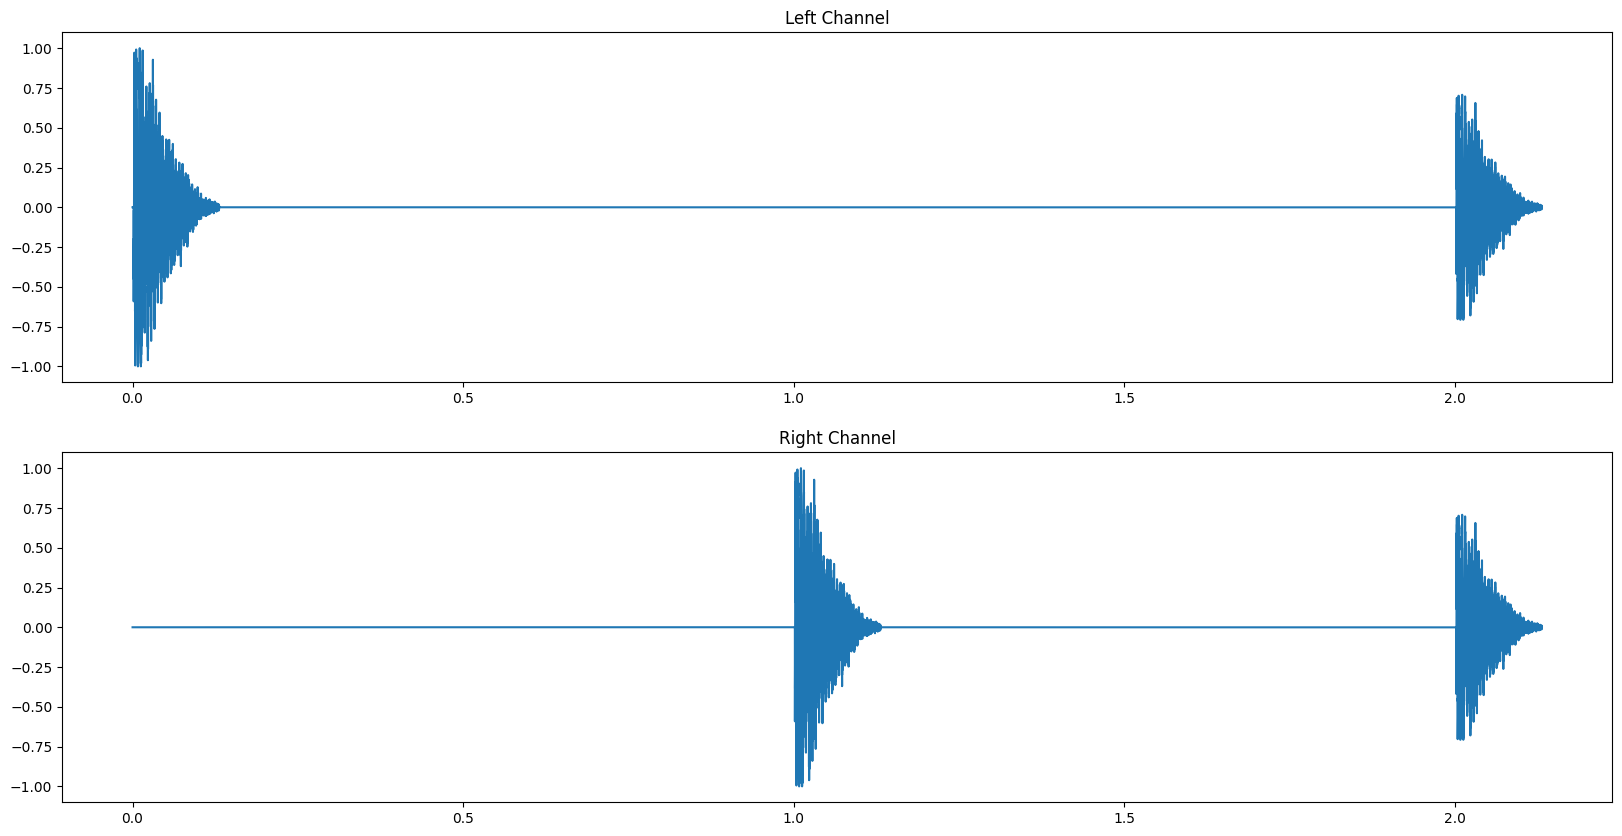

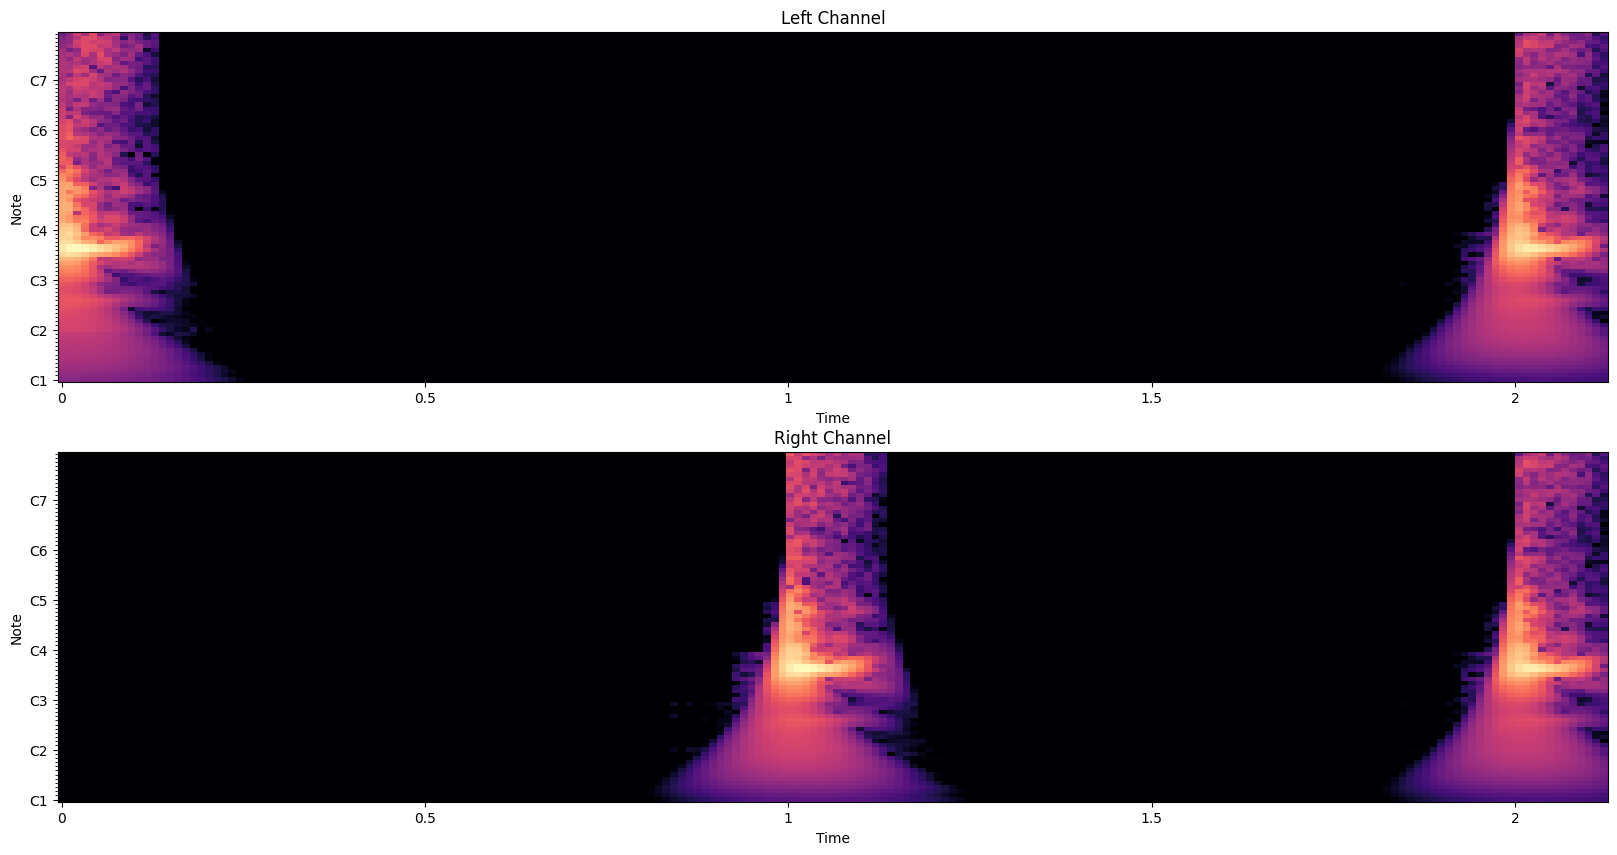

In [29]:
# clear the audio track before adding more audio to start from scratch
track.clear()
# pan the audio to expore the stereo field
# pan = -1 is left, pan = 1 is right, pan = 0 is center
track.add_audio(snare, time=0.0, pan=-1.0)
track.add_audio(snare, time=1.0, pan=1.0)
track.add_audio(snare, time=2.0, pan=0.0)
cosmos.play_audio(track)

# view the "waveform" of the audio, which plots amplitude over time
track.plot_waveform()
# view a spectrogram of the audio, which plots the spectrum (magnitude of 
# different frequencies) over time. (Technically, this is a special kind of 
# spectrogram known as a "constant q transform", whose y-axis is logarithmic
# instead of linear. This is useful for music, because it allows us to see
# the y axis of the plot in the same way that we percieve musical relationships)
track.plot_cqt_spectrogram()

In [30]:
track.clear()
# add the snare sample at specified times
times = [0, 0.25, 0.75, 1.25, 1.5, 1.625, 2, 2.125]
# use a for loop to add the snare sample at each time in the `times` list
for time in times:
    track.add_audio(snare, time=time)

cosmos.play_audio(track)

<Figure size 640x480 with 0 Axes>

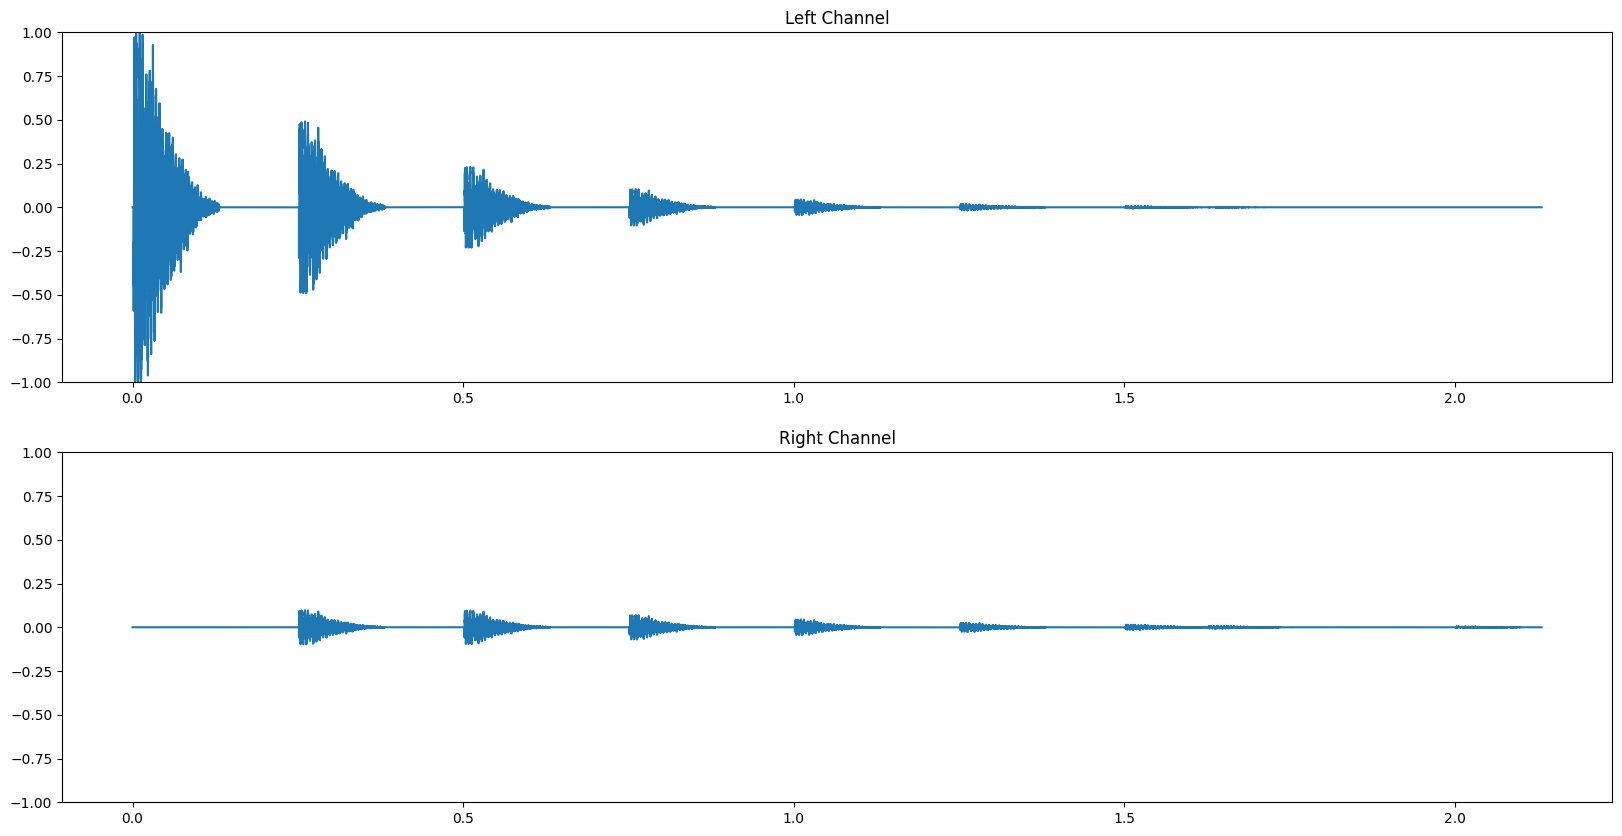

In [33]:
track.clear()
# set the gain of the snare sample (ranging from 0 to 1)
# so that it gets quieter over time
# while panning from left to right
track.add_audio(snare, time=0.0, gain=1.0, pan=-1.0)
track.add_audio(snare, time=0.25, gain=0.5, pan=-0.75)
track.add_audio(snare, time=0.5, gain=0.25, pan=-0.5)
track.add_audio(snare, time=0.75, gain=0.125, pan=-0.25)
track.add_audio(snare, time=1.0, gain=0.0625, pan=0.0)
track.add_audio(snare, time=1.25, gain=0.03125, pan=0.25)
track.add_audio(snare, time=1.5, gain=0.015625, pan=0.5)
track.add_audio(snare, time=1.625, gain=0.0078125, pan=0.75)
track.add_audio(snare, time=2.0, gain=0.00390625, pan=1.0)
cosmos.play_audio(track)

track.plot_waveform()

In [34]:
# Same thing, but with more efficient code
track.clear()
# set the array of times using a list comprehension
# this is equivalent to building the array using a for loop:
''' 
times = []
 for i in range(8):
    times.append(i/4)
'''
times = [i/4 for i in range(8)] # [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]

# set the array of gains using a list comprehension
# this is equivalent to building the array using a for loop:
'''
gains = []
for i in range(8):
    gains.append(2 ** -i)
'''
gains = [2 ** -i for i in range(8)] # [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

pans = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75]
for i in range(len(times)):
    track.add_audio(snare, time=times[i], gain=gains[i], pan=pans[i])
cosmos.play_audio(track)

In [35]:
track.clear()
# faster, longer, slower decay
number_of_events = 32
times = [i/14 for i in range(number_of_events)]
gains = [2 ** (-0.25 * i) for i in range(number_of_events)]
pans = [-1 + i/number_of_events * 2 for i in range(number_of_events)]
for i in range(len(times)):
    track.add_audio(snare, time=times[i], gain=gains[i])
cosmos.play_audio(track)

<Figure size 640x480 with 0 Axes>

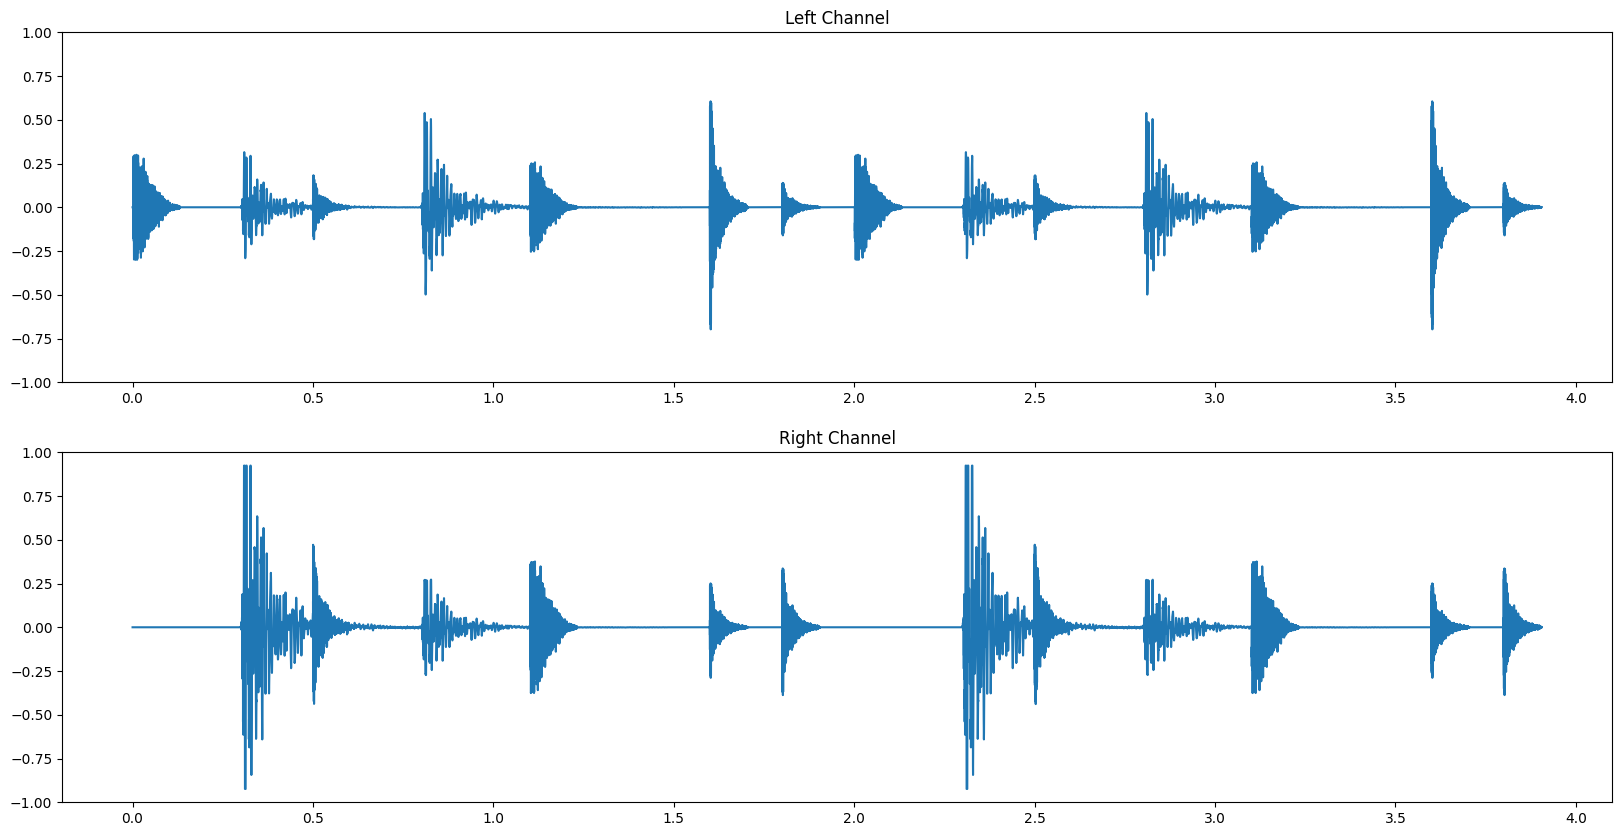

In [39]:
track.clear()

# add multiple different samples to the same track, and repeat them
# all times between 0 and 2 s
times = [0, 0.3, 0.5, 0.8, 1.1, 1.6, 1.8]
gains = [0.3, 1, 0.6, 0.71, 0.45, 0.9, 0.5]
samples = [snare, bongo, agogo_low, bongo, snare, agogo_low, agogo_low]
pans = [-1, 0.5, 0.5, -0.5, 0.25, -0.5, 0.5]
# first add the initial times
for i in range(len(times)):
    track.add_audio(samples[i], time=times[i], gain=gains[i], pan=pans[i])
# then again starting from 2 seconds
for i in range(len(times)):
    track.add_audio(samples[i], time=times[i] + 2, gain=gains[i], pan=pans[i])
cosmos.play_audio(track)

track.plot_waveform()


# Activity: 
1. Go to https://www.freesound.org, sign up for a free account, and download five samples that are all less than 0.5 seconds long. JM will demonstrate how to search and filter. Rename the samples such that they start with your last name (i.e.  `myers_leaf_crunching`). Then, add these samples to [this google drive folder](https://drive.google.com/drive/folders/1HjZSp4v75cPgeulyDoZykOMZ5pNodSJu?usp=sharing). I will add this folder to the notebook while you are working on the rest of this activity, so you will be able to use these samples in the rest of the notebook.  
2. Go through each of the above cells, to get a handle on how everything is working. As you go, play around with parameter numbers to see what sort of effect they have on the generated audio output. You can always `print(...)` variables or equations out to see what their result is. 
3. Add 10 - 20 "snare" audio samples to a `track` using `track.add_audio(...)` at regularly spaced time intervals in which the "gain" (or volume) starts quiet (around 0.0), rises (to around 1.0), and then falls (back to 0.0) over the course of all of the snare events. 
4. Construct an irregular (non-periodic) rhythm out of 4 - 8 "snare" hits that repeats 2 - 3 times.
5. Experiment with adding other samples to create a series of events with a succession of different samples (i.e. 4 `snare` followed by 7 `kick` followed by 3 `bongo`, etc.) 
6. Create a sequence of events that begins by alternating from left to right (`pan=[-1.0, 1.0, ...]`) and gradually is panned to the center (`pan=[..., 0.0, 0.0]`)
7. BONUS: Use a list comprehension (i.e. `[i/5 for i in range(10)]`) to construct a set of time points for snare hits that gradually slows down or speeds up. Hint: first create a `durations` array of time durations that get smaller or bigger, and use that to generate the `times` array. Something along the lines of `durations = [0.5 * 1.1 ** (i) for i in range(num_of_events)]`. To convert `durations` to `times`, you can use a for loop to go through the `durations` list and keep accumulating time with each step. 
```times = []
accumulated_time = 0
for dur in durations:
    times.append(accumulated_time)
    accumulated_time += dur
```

In [131]:
#3
# Add 10 - 20 "snare" audio samples to a `track` using `track.add_audio(...)` at 
# regularly spaced time intervals in which the "gain" (or volume) starts quiet 
# (around 0.0), rises (to around 1.0), and then falls (back to 0.0) over the 
# course of all of the snare events. 
track.clear()

In [132]:
#4
# Construct an irregular rhythm out of 4 - 8 "snare" hits that repeats 2 - 3 times.
track.clear()

In [133]:
#5
# Experiment with adding other samples to create a series of events with a 
# succession of different samples (i.e. 4 `snare` followed by 7 `kick` followed 
# by 3 `bongo`, etc.) 
track.clear()

In [ ]:
#6
# Create a sequence of events that begins by alternating from left to right 
# (`pan=[-1.0, 1.0, ...]`) and gradually is panned to the center 
# (`pan=[..., 0.0, 0.0]`)
track.clear()

In [134]:
#7
# BONUS: Use a list comprehension (i.e. `[i/5 for i in range(10)]`) to construct 
# a set of time points for snare hits that gradually slows down or speeds up. 
# Hint: first create a `durations` array of time durations that get smaller or 
# bigger, and use that to generate the `times` array. Something along the lines 
# of `durations = [0.5 * 1.1 ** (i) for i in range(num_of_events)]`. To convert 
# `durations` to `times`, you can use a for loop to go through the `durations` 
# list and keep accumulating time with each step. 

# times = []
# accumulated_time = 0
# for dur in durations:
#     times.append(accumulated_time)
#     accumulated_time += dur
track.clear()

## Patterns

In [135]:
# once the student selected samples have been uploaded, run this cell

!rm -rf cosmos
!git clone https://github.com/jon-myers/cosmos

In [40]:
# Create a pattern of times (using durations), gains, and pans
track = cosmos.AudioTrack(duration=20)
durations = [1/2, 1/4, 1/2, 1/4, 1/8, 3/8]
gains = [0.3, 0.7, 0.3, 1, 0.7, 0.2]
pans = [-1, -0.6, -0.2, 0.2, 0.6, 1]
pattern = cosmos.Pattern(durations=durations, gains=gains, samples=snare, cycles=1, pans=pans)
track.add_audio(pattern.to_audio())
cosmos.play_audio(track)


<Figure size 640x480 with 0 Axes>

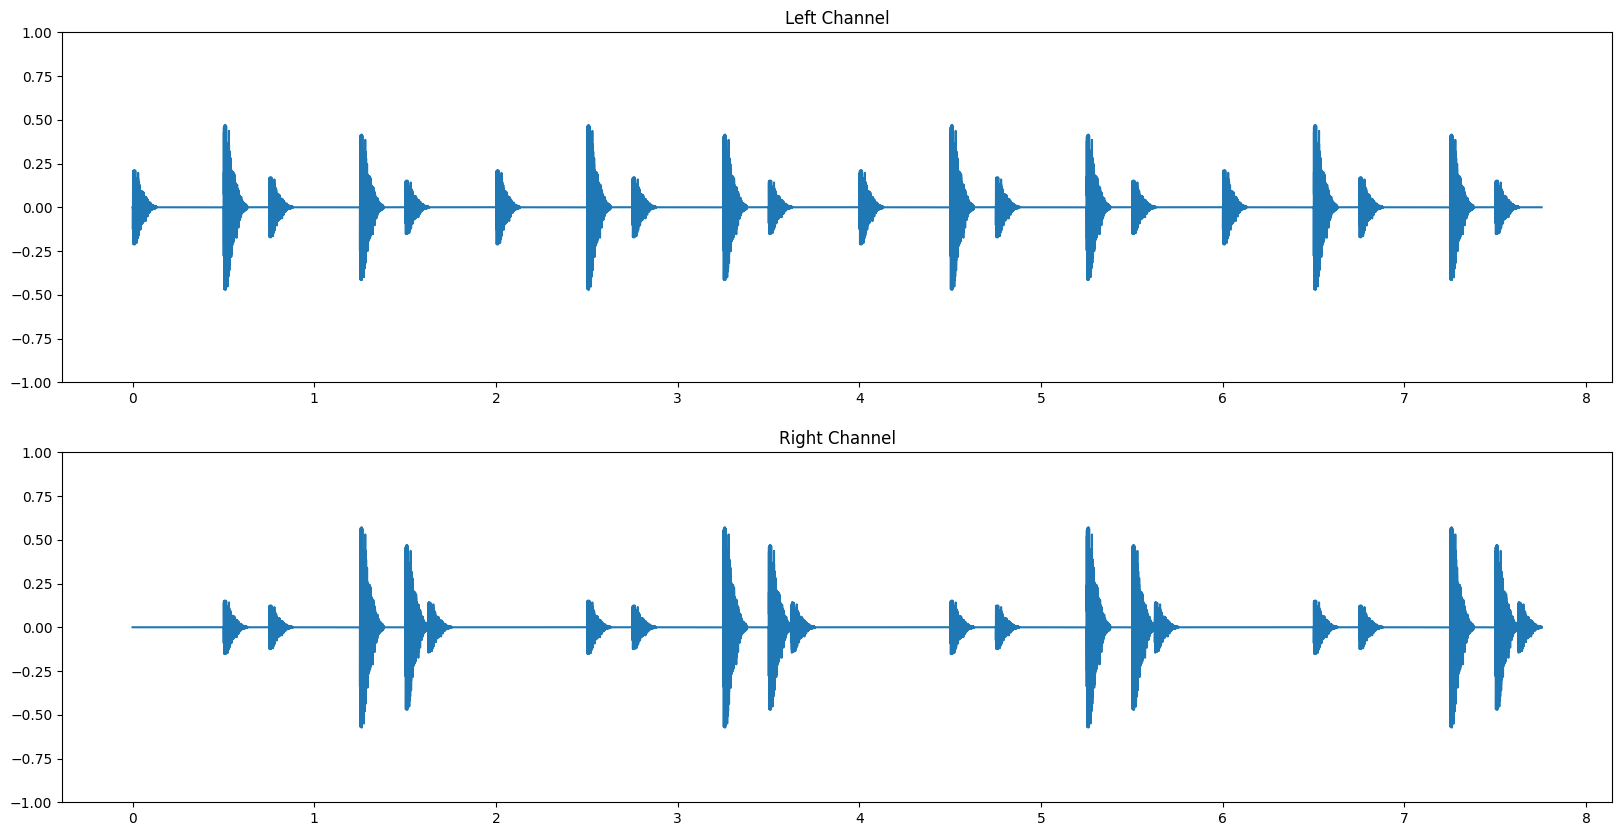

In [42]:
# Make the pattern repeat 4 times
track.clear()
pattern.cycles = 4
track.add_audio(pattern.to_audio())
cosmos.play_audio(track)
track.plot_waveform()

In [43]:
# vary the samples
track.clear()

samples_1 = [hihat, hihat, snare, hihat, hihat, snare]
gains_1 = [0.3, 0.7, 0.3, 1, 0.7, 0.2]
pans_1 = [1, 0.6, 0.2, -0.2, -0.6, -1]
pattern = cosmos.Pattern(durations=durations, gains=gains, samples=samples_1, pans=pans_1, cycles=4)
track.add_audio(pattern.to_audio(), time=0.0)
cosmos.play_audio(track)

<Figure size 640x480 with 0 Axes>

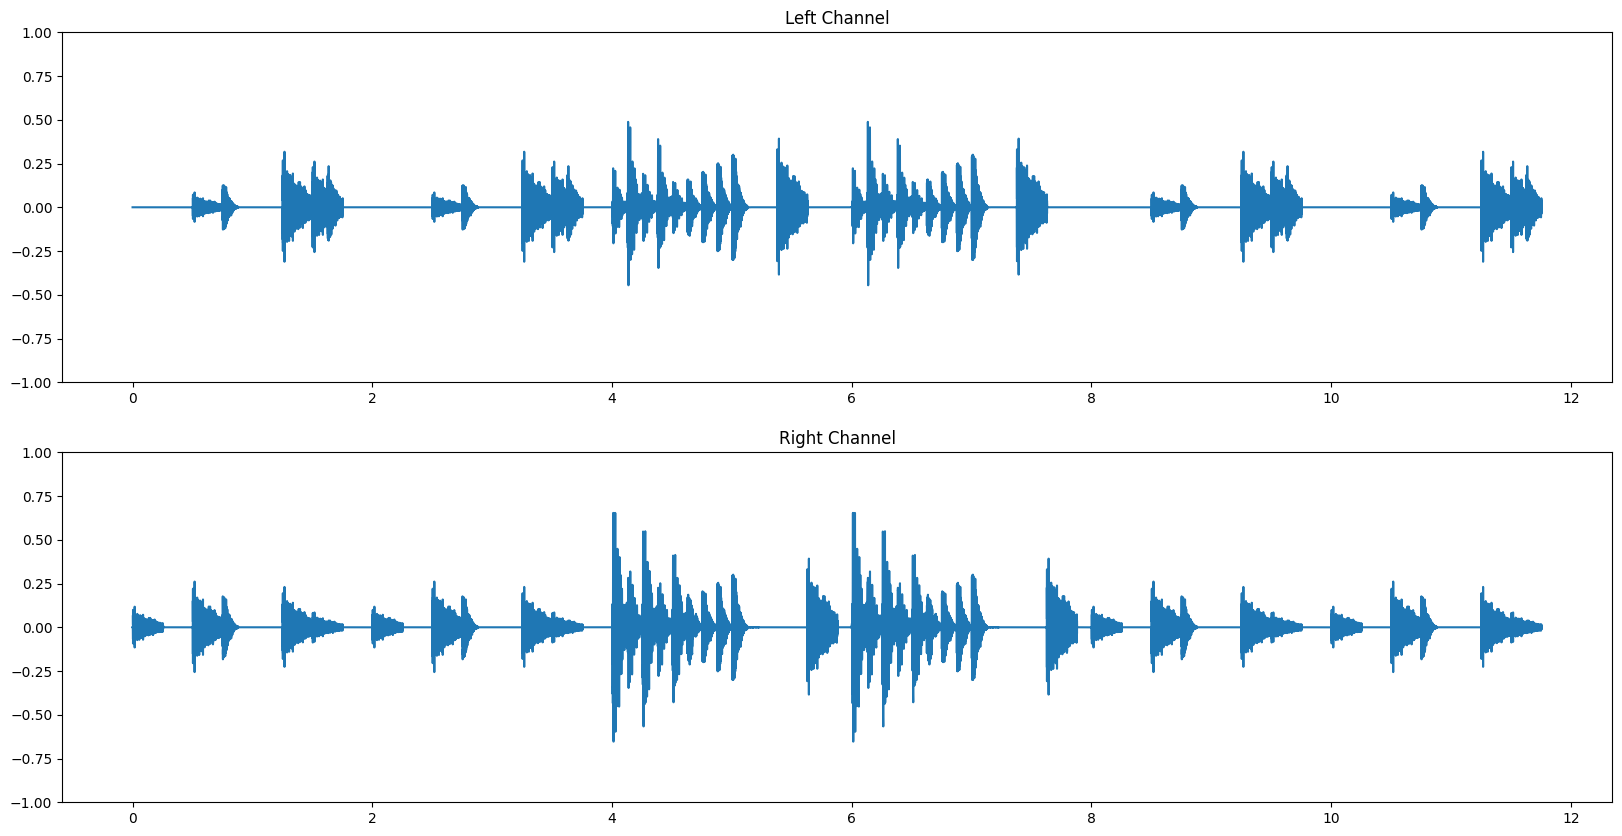

In [47]:
# create a new pattern, and alternate between the two patterns
track.clear()

pattern_1 = cosmos.Pattern(durations=durations, gains=gains, samples=samples_1, pans=pans_1, cycles=2)
durations_2 = [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 3/8, 1/4, 3/8]
samples_2 = [bongo, bongo, bongo, bongo, bongo, snare, snare, snare, snare, hihat, hihat]
gains_2 = [1, 0.9, 0.8, 0.7, 0.6, 0.3, 0.4, 0.5, 0.6, 1, 1]
pans_2 = [0.5, -0.5, 0.5, -0.5, 0.5, 0, 0, 0, 0, -1, 1]
pattern_2 = cosmos.Pattern(durations=durations_2, gains=gains_2, samples=samples_2, pans=pans_2, cycles=2)
# add the first pattern
track.add_audio(pattern_1.to_audio(), time=0.0)
next_time = pattern_1.dur_tot
# add the second pattern
track.add_audio(pattern_2.to_audio(), time=next_time)
next_time += pattern_2.dur_tot
# add the first pattern again
track.add_audio(pattern_1.to_audio(), time=next_time)
cosmos.play_audio(track)
track.plot_waveform()


<Figure size 640x480 with 0 Axes>

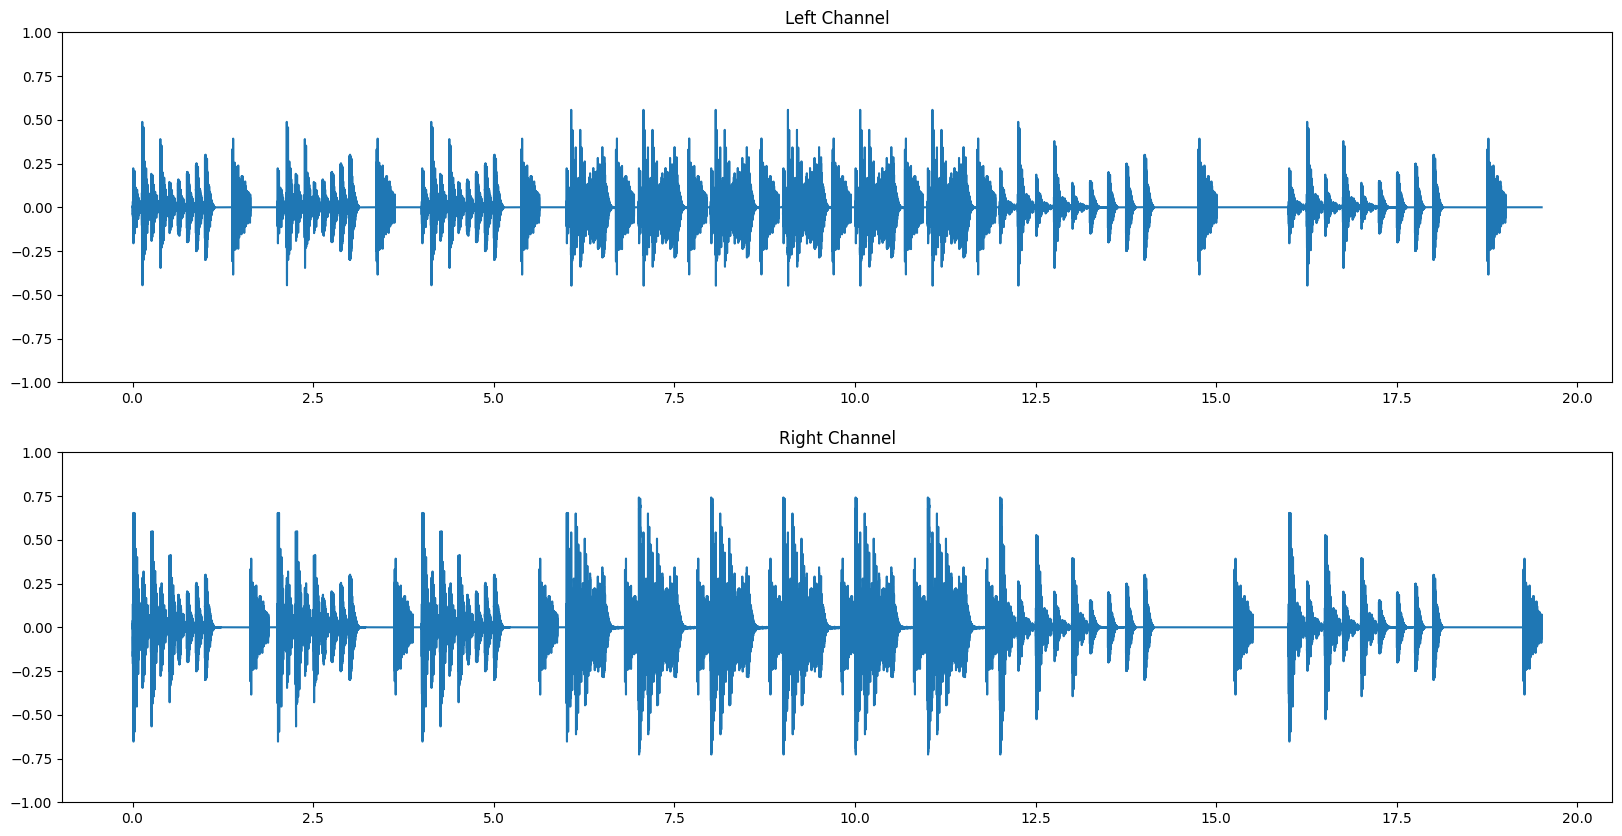

In [50]:
track.clear()
# alter the total duration of a pattern

# first add a pattern, with three total repetitions
pattern_2 = cosmos.Pattern(durations=durations_2, gains=gains_2, samples=samples_2, pans=pans_2, cycles=3)
track.add_audio(pattern_2.to_audio(), time=0.0)
next_time = pattern_2.dur_tot
# then change the total duration of the pattern, making it twice as fast
pattern_2.set_cycle_duration(pattern_2.cycle_dur / 2)
# and extend the number of repetitions
pattern_2.cycles *= 2 # *= means multiply and assign the result to the variable
# add the pattern again
track.add_audio(pattern_2.to_audio(), time=next_time)

# now make it twice as slow, with a total of 2 repetitions
next_time += pattern_2.dur_tot
pattern_2.set_cycle_duration(pattern_2.cycle_dur * 4)
pattern_2.cycles = 2
# add the pattern again
track.add_audio(pattern_2.to_audio(), time=next_time)
cosmos.play_audio(track)
track.plot_waveform()

<Figure size 640x480 with 0 Axes>

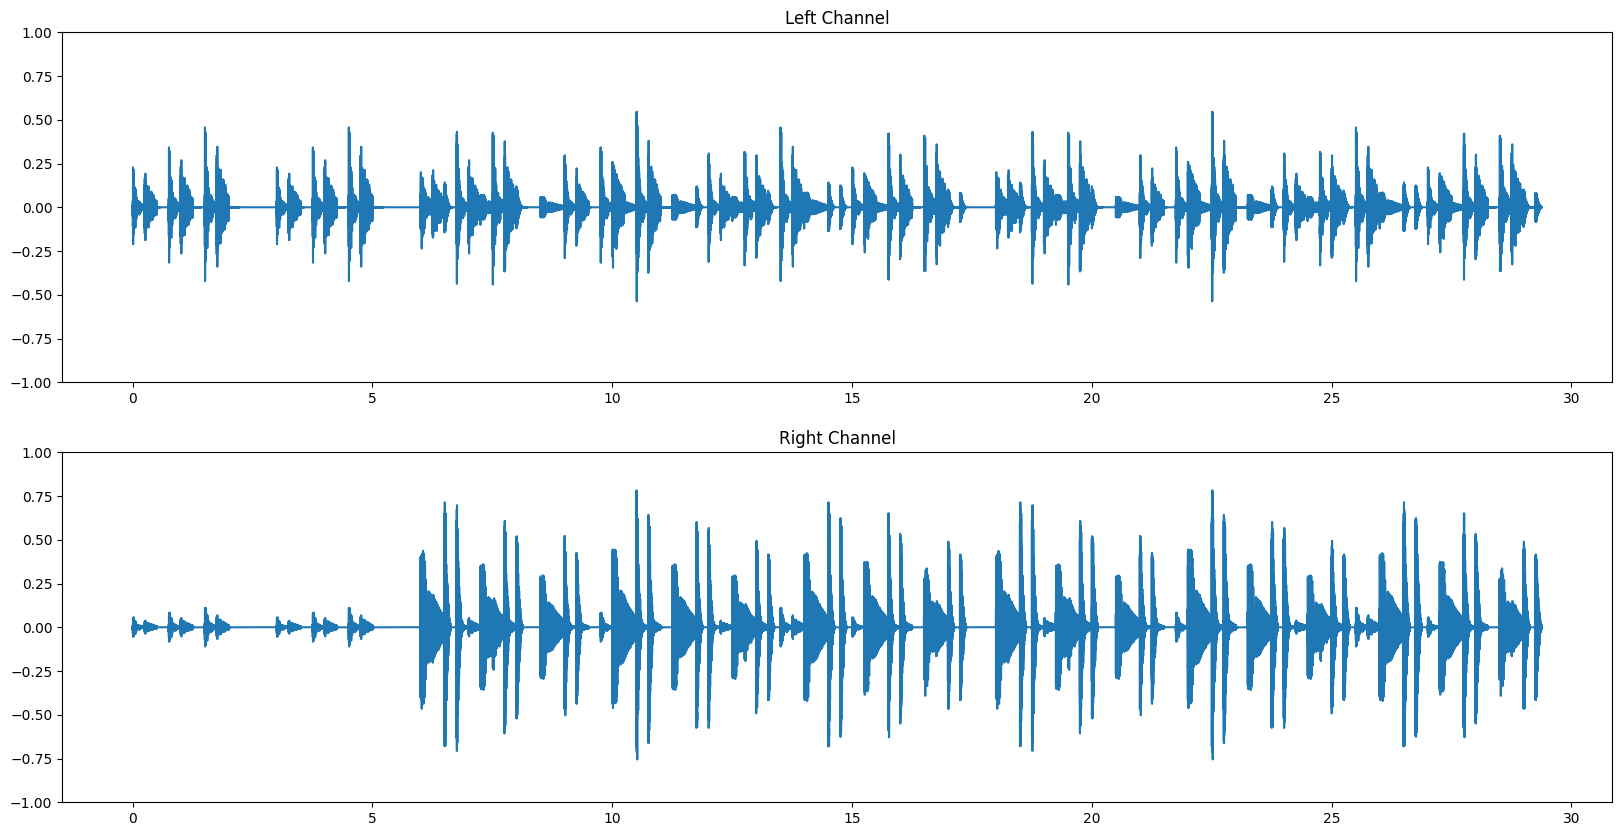

In [54]:
track.clear()
# multiple patterns at the same time, that phase over each other
# starts with two repetitions of the first pattern, then the second one joins in

durations_3 = [1/4, 1/2, 1/4, 1/2, 1/4, 5/4] # sums to 3
samples_3 = [bongo, hihat, bongo, hihat, bongo, hihat]
gains_3 = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pattern_3 = cosmos.Pattern(durations=durations_3, gains=gains_3, samples=samples_3, pans=[-0.75], cycles=10)

durations_4 = [1/2, 1/4, 1/2, 1/2, 1/4, 1/2, 1/2, 1/4, 3/4] # sums to 4
samples_4 = [kick, snare, snare, kick, snare, snare, kick, snare, snare]
gains_4 = [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
pattern_4 = cosmos.Pattern(durations=durations_4, gains=gains_4, samples=samples_4, pans=[0.75], cycles=6)

# time after two repetitions of pattern_3
entrance_time = 2 * pattern_3.cycle_dur

# add the first pattern
track.add_audio(pattern_3.to_audio(), time=0.0)
# add the second pattern
track.add_audio(pattern_4.to_audio(), time=entrance_time)
cosmos.play_audio(track)
track.plot_waveform()

<Figure size 640x480 with 0 Axes>

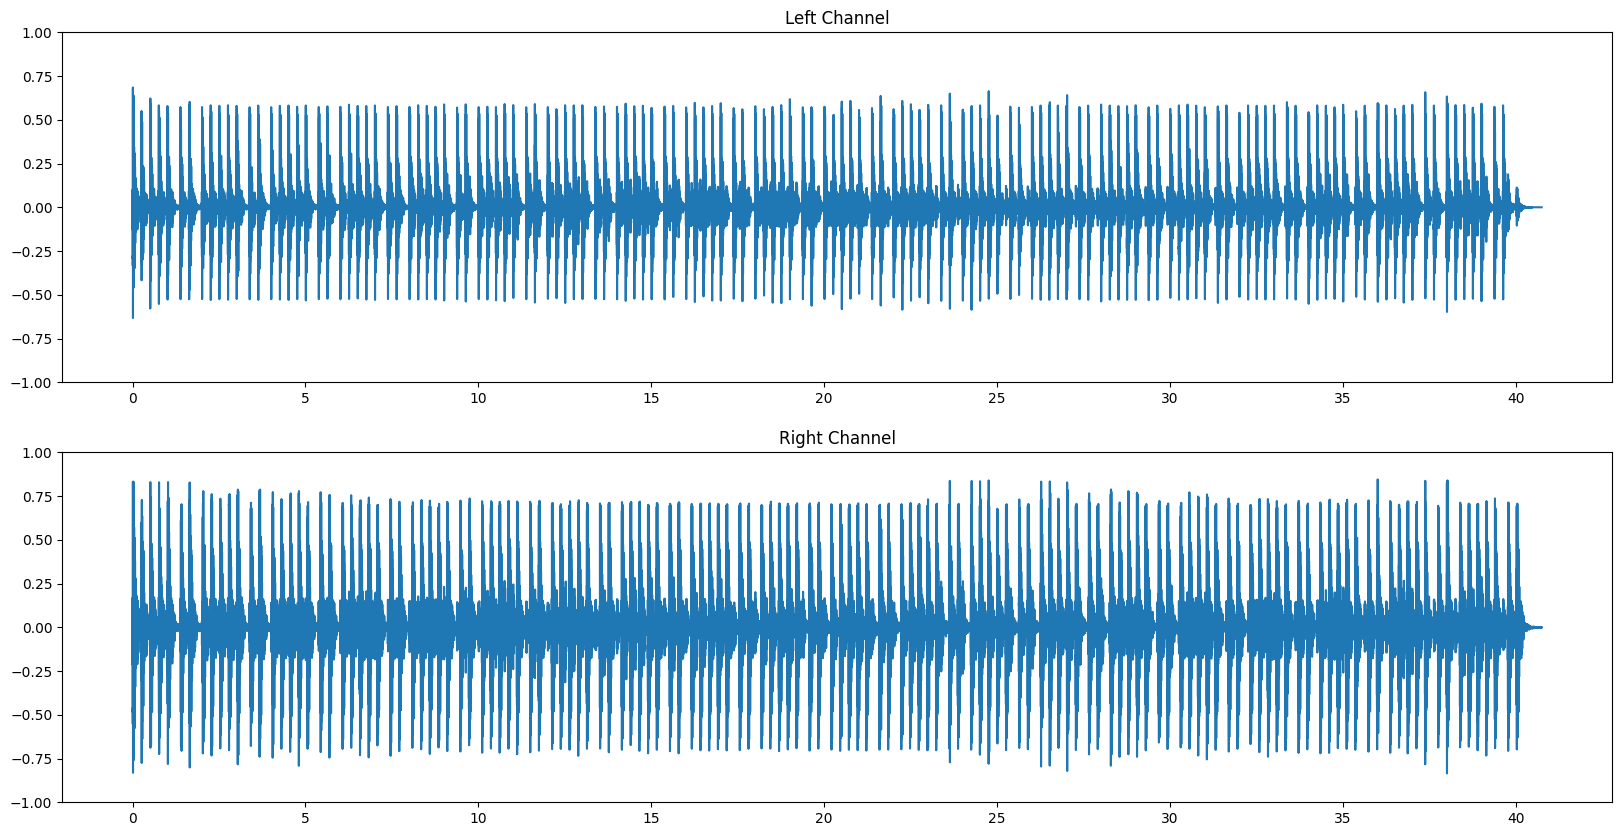

In [57]:
#create a very subtle phase effect
track.clear()
durations = [1/4, 1/4, 1/4, 1/4, 3/8, 1/4, 3/8]
gains = [1 for i in range(len(durations))]
pattern_5 = cosmos.Pattern(durations=durations, gains=gains, samples=[bongo], cycles=20)
track.add_audio(pattern_5.to_audio(), time=0.0, pan=-0.75)
# alter the cycle duration slightly
pattern_6 = cosmos.Pattern(durations=durations, gains=gains, samples=[bongo], cycles=20)
pattern_6.set_cycle_duration(pattern_6.cycle_dur * 1.01)
track.add_audio(pattern_6.to_audio(), time=0.0, pan=0.75)
cosmos.play_audio(track)
track.plot_waveform()

# Activity

1. Work through the above cells, again, making sure to try to understand how everything is working. Experiment by altering the numbers, choices of sample, etc.
2. Make a pattern using at least four samples, where the volume gets quieter over the course of the pattern. Have it repeat a number of times. Feel free to use your own samples, or samples from your peers!
3. Make three different patterns, and alternate between them in the following form: `A, B, A, C, B, A, C, B, C, B`. Hint: be sure to use a variable `next_time` initialized as `next_time=0` that keeps accumulating time as you add each pattern to an audio track. Use this accumulating time when adding each pattern (i.e. `track.add_audio(pattern.to_audio(), time=next_time)`)
4. Generate two patterns, one very fast and quiet, one very slow and loud, and have them phase over each-other. (By phase, I mean they should each repeat but have a differnet total cycle duration. Could be a very subtle difference, or a clear one, up to you!)
5. Make a pattern repeat 5 times, but each time it repeats, it should be at a different speed.
6. BONUS: Use a random number generator to decide the durations of a pattern. To generate five random numbers between 0.5 and 1.5, you can either use python's built in random generator like this `[random.randrange(0.5, 1.5) for i in range(5)]`, or the `numpy` library like this `np.random.uniform(0.5, 1.5, 5)`.


In [143]:
#2
# Make a pattern using at least four samples, where the volume gets quieter over 
# the course of the pattern. Have it repeat a number of times. Feel free to use 
# your own samples, or samples from your peers!

# To use one of the samples we just added, load it like this:
# my_sample = cosmos.load_audio(path + "init_samples/freesound_samples/myers_my_sample.wav")

track.clear()



In [144]:
#3
# Make three different patterns, and alternate between them in the following 
# form: `A, B, A, C, B, A, C, B, C, B`. Hint: be sure to use a variable 
# `next_time` initialized as `next_time=0` that keeps accumulating time as you 
# add each pattern to an audio track. Use this accumulating time when adding 
# each pattern (i.e. `track.add_audio(pattern.to_audio(), time=next_time)`)
track.clear()

In [145]:
#4
# Generate two patterns, one very fast and quiet, one very slow and loud, and 
# have them phase over each-other. (By phase, I mean they should each repeat but 
# have a differnet total cycle duration. Could be a very subtle difference, or a 
# clear one, up to you!)
track.clear()

In [146]:
#5
# Make a pattern repeat 5 times, but each time it repeats, it should be at a 
# different speed.
track.clear()


# Working with Meter

all_pulses
[ 0.   0.6  1.2  1.8  2.4  3.   3.6  4.2  4.8  5.4  6.   6.6  7.2  7.8
  8.4  9.   9.6 10.2 10.8 11.4 12.  12.6 13.2 13.8 14.4 15.  15.6 16.2
 16.8 17.4 18.  18.6]

 all_subdivisions
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7 15.  15.3 15.6 15.9 16.2 16.5
 16.8 17.1 17.4 17.7 18.  18.3 18.6 18.9]


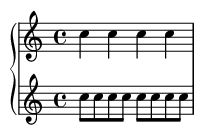

In [60]:
# define a "4/4" meter with 4 beats per measure and each beat subdivided into two parts
# tempo of 60 bpm, for 4 cycles

num_cycles = 8
simple_meter = cosmos.Meter(hierarchy=[4, 2], tempo=100, cycles=num_cycles)
all_subdivisions = simple_meter.all_times(top_layer=2)
all_pulses = simple_meter.all_times(top_layer=1)
print('all_pulses')
print(all_pulses)
print('\n', 'all_subdivisions')
print(all_subdivisions)
# for subdivision in all_subdivisions:
    # print(subdivision)
display(Image(path + 'notation/example_1.png'))



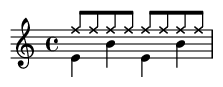

In [65]:
track.clear()
# add hi-hat every subdivision

# first we define a function that will create the drumset pattern and add it to the track
def set_up_basic_drumset_meter(track, tempo=120, cycles=8):
    simple_meter = cosmos.Meter(hierarchy=[4, 2], tempo=tempo, cycles=cycles)
    all_subdivisions = simple_meter.all_times()
    all_pulses = simple_meter.all_times(top_layer=1)    

    for time in all_subdivisions:
        track.add_audio(hihat, time=time)
    # add kick on every other pulse
    kick_times = [all_pulses[i] for i in range(len(all_pulses)) if i % 2 == 0]
    for time in kick_times:
        track.add_audio(kick, time=time)
    snare_times = [all_pulses[i] for i in range(len(all_pulses)) if i % 2 == 1]
    for time in snare_times:
        track.add_audio(snare, time=time)
    return simple_meter

# now we will call that function
simple_meter = set_up_basic_drumset_meter(track, tempo=120)
cosmos.play_audio(track)
display(Image(path + 'notation/example_4.png'))



Audio would have clipped, had to normalize it first.


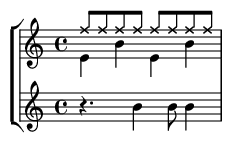

In [66]:
track.clear()
# set up basic drum track
simple_meter = set_up_basic_drumset_meter(track)

# now add bongo hits one by one
# remember: the first beat is beat 0, the first subdivision is subdivision 0!

#beat 2, subdivision 2 
time = simple_meter.get_time([1, 1])
track.add_audio(bongo, time=time)
# beat 3, subdivision 2
time = simple_meter.get_time([2, 1])
track.add_audio(bongo, time=time)
# beat 4, subdivision 1
time = simple_meter.get_time([3, 0])
track.add_audio(bongo, time=time)
cosmos.play_audio(track)
display(Image(path + 'notation/example_5.png'))


Audio would have clipped, had to normalize it first.


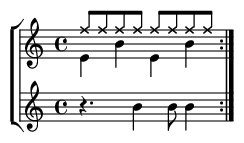

In [68]:
track.clear()
# set up basic drum track
simple_meter = set_up_basic_drumset_meter(track)
# same thing, but adding the bongo hits programmatically

# now add some bongo hits by setting up the pulse / subdivisions in advance
bongo_hits = [[1, 1], [2, 1], [3, 0]]

# for every cycle in the meter, add the bongo hits
for cycle in range(num_cycles):
    for hit in bongo_hits:
        time = simple_meter.get_time(hit, cycle=cycle)
        track.add_audio(bongo, time=time)
cosmos.play_audio(track)
display(Image(path + 'notation/example_5.png'))


Audio would have clipped, had to normalize it first.


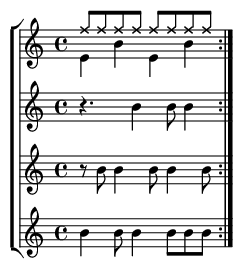

In [70]:
track.clear()
# set up basic drum track
simple_meter = set_up_basic_drumset_meter(track)

# make a few bongo variations, and then apply them to different cycles in the meter
bongo_hits_1 = [[1, 1], [2, 1], [3, 0]]
bongo_hits_2 = [[0, 1], [1, 0], [2, 0], [2, 1], [3, 1]]
bongo_hits_3 = [[0, 0], [1, 0], [1, 1], [2, 1], [3, 0], [3, 1]]

for cycle in range(num_cycles):
    if (cycle == 0 or cycle == 1 or cycle == 4):
        bongo_hits = bongo_hits_1
    elif (cycle == 2 or cycle == 5 or cycle == 6 or cycle == 7):
        bongo_hits = bongo_hits_2
    else:
        bongo_hits = bongo_hits_3
    for hit in bongo_hits:
        time = simple_meter.get_time(hit, cycle=cycle)
        track.add_audio(bongo, time=time)
cosmos.play_audio(track)

display(Image(path + 'notation/example_6.png'))
    

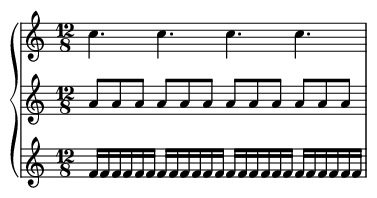

In [71]:
track.clear()
#  set up a 12/8 meter, 4 beats each subdivided into 3 parts
#  tempo of 100 bpm, for 8 cycles

# loosely based on Ghanaian traditional drum piece "Agbekor"

# hierarchy=[4, 3, 2] Indicates that this is a meter with a 4 pulses, each 
# subdivided into 3 subdivisions, and each subdivision is divided into 2 parts

new_meter = cosmos.Meter(hierarchy=[4, 3, 2], tempo=100, cycles=8)

display(Image(path + 'notation/example_2.png'))

Audio would have clipped, had to normalize it first.


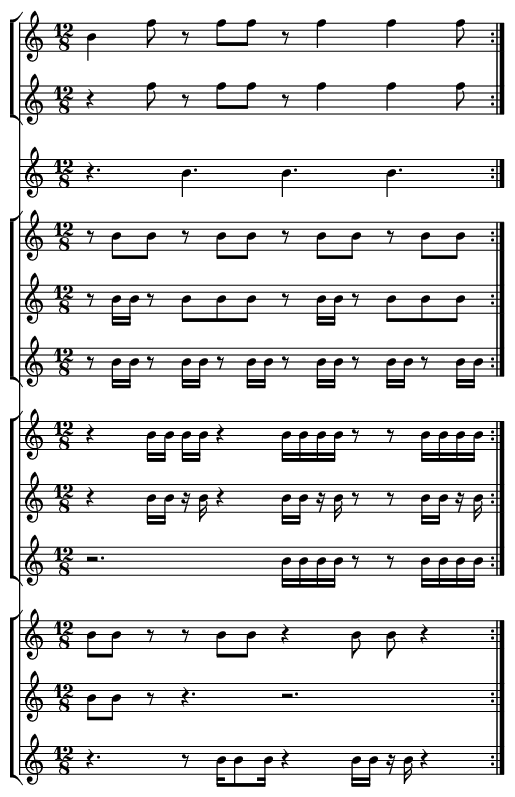

In [79]:
track.clear()
num_cycles=10

# agogo bell, two variations
bell_var_1 = [[0, 0], [0, 2], [1, 1], [1, 2], [2, 1], [3, 0], [3, 2]]
bell_var_2 = [[0, 2], [1, 1], [1, 2], [2, 1], [3, 0]]
bell_samples_1 = [agogo_high for i in range(len(bell_var_1))]
bell_samples_1[0] = agogo_low
bell_samples_2 = [agogo_high for i in range(len(bell_var_2))]

# finger cymbals
finger_cymbal_pulses = [[1, 0], [2, 0], [3, 0]]

# low thud, three variations
thud_var_1 = [[0, 1], [0, 2], [1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2]]
thud_var_2 = [
    [0, 1, 0], [0, 1, 1], [1, 0], [1, 1], [1, 2], 
    [2, 1, 0], [2, 1, 1], [3, 0], [3, 1], [3, 2]
]
thud_var_3 = [
    [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 2, 0], [1, 2, 1],
    [2, 1, 0], [2, 1, 1], [3, 0, 0], [3, 0, 1], [3, 2, 0], [3, 2, 1]
]

# bongo, three variations
bongo_var_1 = [
    [0, 2, 0], [0, 2, 1], [1, 0, 0], [1, 0, 1],
    [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 0], [3, 2, 1]
]
bongo_var_2 = [
    [0, 2, 0], [0, 2, 1], [1, 0, 1],
    [2, 0, 0], [2, 0, 1], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 1]
]
bongo_var_3 = [
    [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1],
    [3, 1, 0], [3, 1, 1], [3, 2, 0], [3, 2, 1]
]

# conga, three variations
conga_var_1 = [
    [0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [3, 0]
]
conga_var_2 = [
    [0, 0], [0, 1]
]
conga_var_3 = [[1, 1, 0], [1, 1, 1], [1, 2, 1], 
               [2, 2, 0], [2, 2, 1], [3, 0, 1]]


for cycle in range(num_cycles):
    # agogo bell
    # randomly choose between two variations
    # -------------------------------------------------------------------------
    bell_var_idx = np.random.choice([0, 1], p=[0.75, 0.25], size=1)[0]
    bell_samples = [bell_samples_1, bell_samples_2][bell_var_idx]
    bell_var = [bell_var_1, bell_var_2][bell_var_idx]
    for h in range(len(bell_samples)):
        time = new_meter.get_time(bell_var[h], cycle=cycle)
        track.add_audio(bell_samples[h], time=time)
    # -------------------------------------------------------------------------

    # finger cymbals
    # -------------------------------------------------------------------------
    for h in range(len(finger_cymbal_pulses)):
        time = new_meter.get_time(finger_cymbal_pulses[h], cycle=cycle)
        track.add_audio(finger_cymbal, time=time, pan=-0.3)
    # -------------------------------------------------------------------------

    # muted_thud
    # randomly choose between three variations
    # -------------------------------------------------------------------------
    # thud_var_idx = np.random.choice([0, 1, 2], p=[0.5, 0.25, 0.25], size=1)[0]
    # thud_var = [thud_var_1, thud_var_2, thud_var_3][thud_var_idx]
    # for h in range(len(thud_var)):
    #     time = new_meter.get_time(thud_var[h], cycle=cycle)
    #     track.add_audio(muted_thud, time=time, pan=0.3)
    # -------------------------------------------------------------------------

    # bongo
    # randomly choose between three variations
    # -------------------------------------------------------------------------
    # bongo_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    # bongo_var = [bongo_var_1, bongo_var_2, bongo_var_3][bongo_var_idx]
    # for h in range(len(bongo_var)):
    #     time = new_meter.get_time(bongo_var[h], cycle=cycle)
    #     track.add_audio(bongo, time=time, gain=0.66, pan=0.6)
    # -------------------------------------------------------------------------

    # conga
    # randomly choose between three variations
    # -------------------------------------------------------------------------
    # conga_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    # conga_var = [conga_var_1, conga_var_2, conga_var_3][conga_var_idx]
    # for h in range(len(conga_var)):
    #     time = new_meter.get_time(conga_var[h], cycle=cycle)
    #     track.add_audio(conga, time=time, pan=-0.6)
    # -------------------------------------------------------------------------

cosmos.play_audio(track)
display(Image(path + 'notation/example_7.png'))

Audio would have clipped, had to normalize it first.


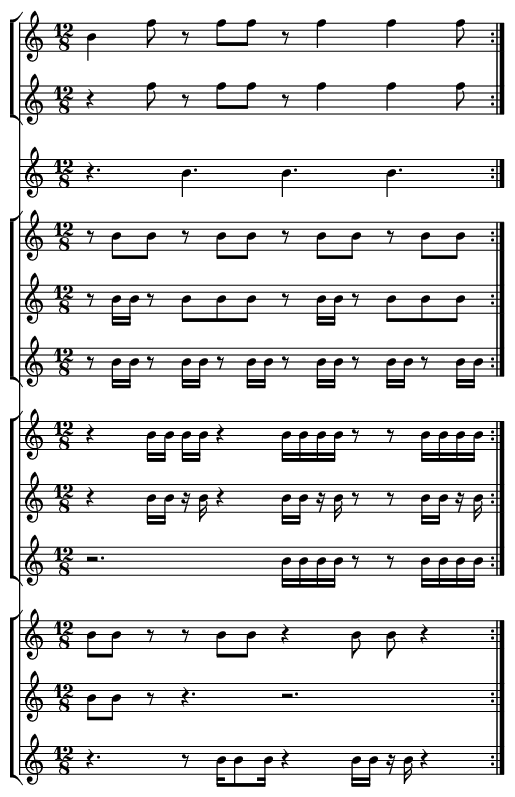

In [80]:
# Same patterns as above, but now with gains randomly getting louder and softer
# with the use of a "random walk" function.
track.clear()

for cycle in range(num_cycles):
    # agogo bell
    # randomly choose between two variations
    bell_var_idx = np.random.choice([0, 1], p=[0.75, 0.25], size=1)[0]
    bell_samples = [bell_samples_1, bell_samples_2][bell_var_idx]
    bell_var = [bell_var_1, bell_var_2][bell_var_idx]
    bell_walk = cosmos.RandomWalk() # add a random walk
    for h in range(len(bell_samples)):
        time = new_meter.get_time(bell_var[h], cycle=cycle)
        track.add_audio(bell_samples[h], time=time, gain=bell_walk.step())

    # finger cymbals 
    cymbal_walk = cosmos.RandomWalk() # add a random walk
    for h in range(len(finger_cymbal_pulses)):
        time = new_meter.get_time(finger_cymbal_pulses[h], cycle=cycle)
        track.add_audio(finger_cymbal, time=time, gain=cymbal_walk.step(), pan=-0.3)

    # muted_thud
    # randomly choose between three variations
    thud_var_idx = np.random.choice([0, 1, 2], p=[0.5, 0.25, 0.25], size=1)[0]
    thud_var = [thud_var_1, thud_var_2, thud_var_3][thud_var_idx]
    thud_walk = cosmos.RandomWalk() # add a random walk
    for h in range(len(thud_var)):
        time = new_meter.get_time(thud_var[h], cycle=cycle)
        track.add_audio(muted_thud, time=time, gain=thud_walk.step(), pan=0.3)

    # bongo
    # randomly choose between three variations
    bongo_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    bongo_var = [bongo_var_1, bongo_var_2, bongo_var_3][bongo_var_idx]
    bongo_walk = cosmos.RandomWalk() # add a random walk
    for h in range(len(bongo_var)):
        time = new_meter.get_time(bongo_var[h], cycle=cycle)
        track.add_audio(bongo, time=time, gain=bongo_walk.step(), pan=0.6)

    # conga
    # randomly choose between three variations
    
    conga_var_idx = np.random.choice([0, 1, 2], size=1)[0]
    conga_var = [conga_var_1, conga_var_2, conga_var_3][conga_var_idx]
    conga_walk = cosmos.RandomWalk() # add a random walk
    for h in range(len(conga_var)):
        time = new_meter.get_time(conga_var[h], cycle=cycle)
        track.add_audio(conga, time=time, gain=conga_walk.step(), pan=-0.6)

cosmos.play_audio(track)
display(Image(path + 'notation/example_7.png'))

# Activity
1. Step through the above cells again, making sure to try to understand how everything is working. Experiment by altering the numbers, choices of sample, etc.
2. Create a 12/8 meter and fill it with a "shuffle" drum pattern, as notated beneath the next cell. 12/8 indicates a meter with four beats, each of which are subdivided into three parts. (so, `hierarchy = [4, 3]`). The `hihat` should occur at every subdivision of the beat. The snare should occur on beats 2 and 4. The kick should occur on beat 1 and the last subdivision of each beat.
3. Write four variations using whatever samples you like (including your own?), 
and sequence them over the course of many reptitions. (Challenge: randomly generate the sequence of variations!)
4. 
    a. Create a new meter with three layers of hierarchy. Compose (at least) four 
    overlapping rhythms, and layer them on top of eachother. (see the Ghainain drumming example)
    b. Compose variations for each of these layers, and experiment with sequencing and/or randomly choosing among variations
    c. apply a "random walk" to some or all of the gains.

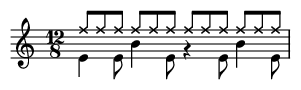

In [155]:
display(Image(path + 'notation/example_3.png'))

# Fun with "Chance Operations" (randomization) and Patterns

In [83]:
# load samples
import os
folder_path = path + "samples"
file_names = [folder_path + '/' + i for i in os.listdir(folder_path)]
samples = [cosmos.load_audio(i) for i in file_names]

Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.
Max amplitude was 1.000030517578125, normalizing.


<Figure size 640x480 with 0 Axes>

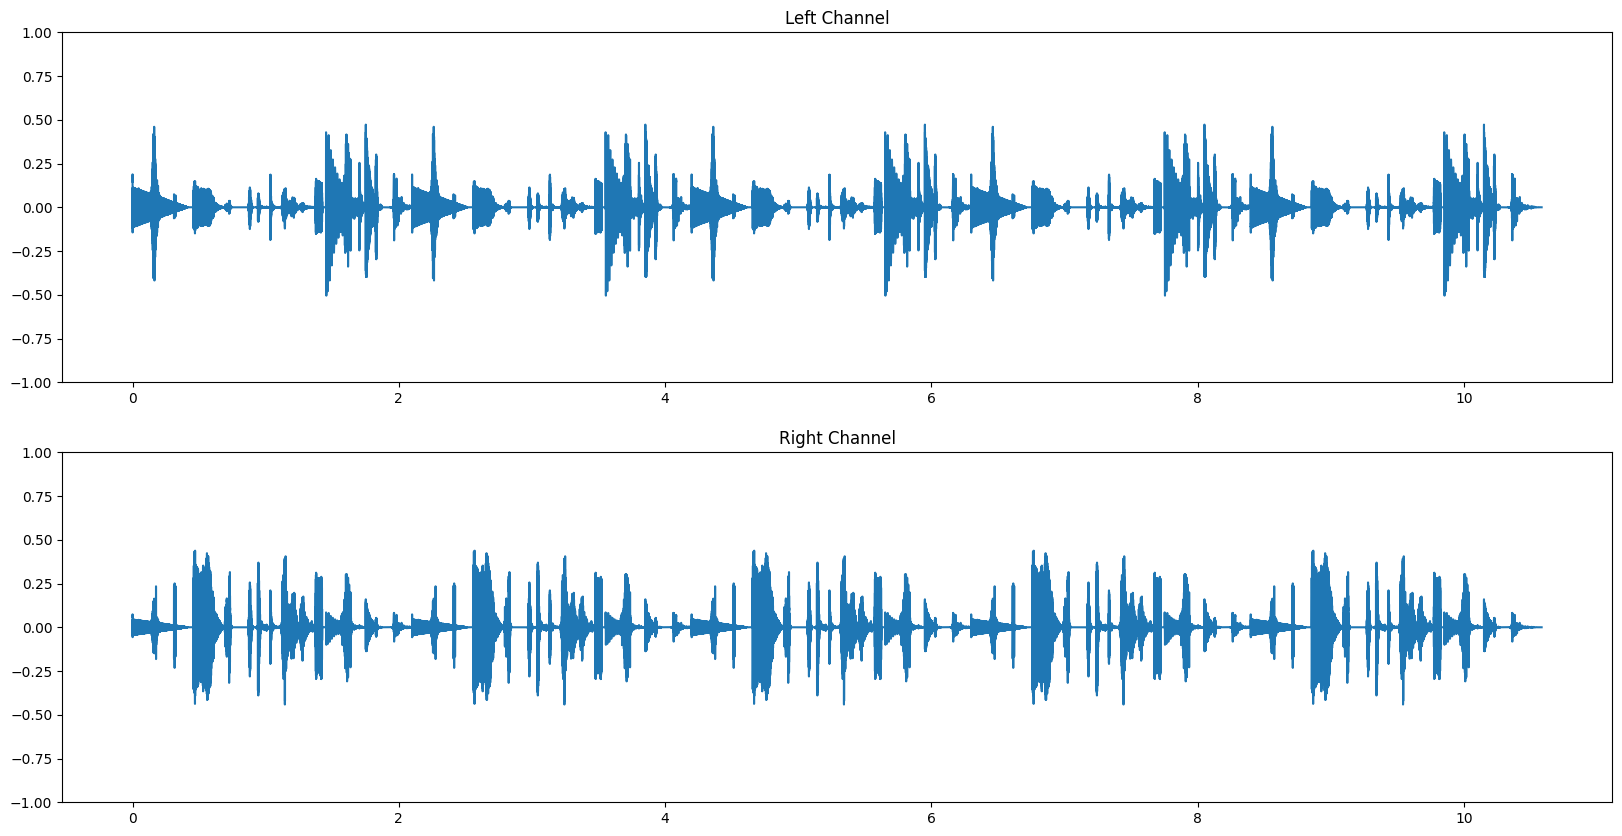

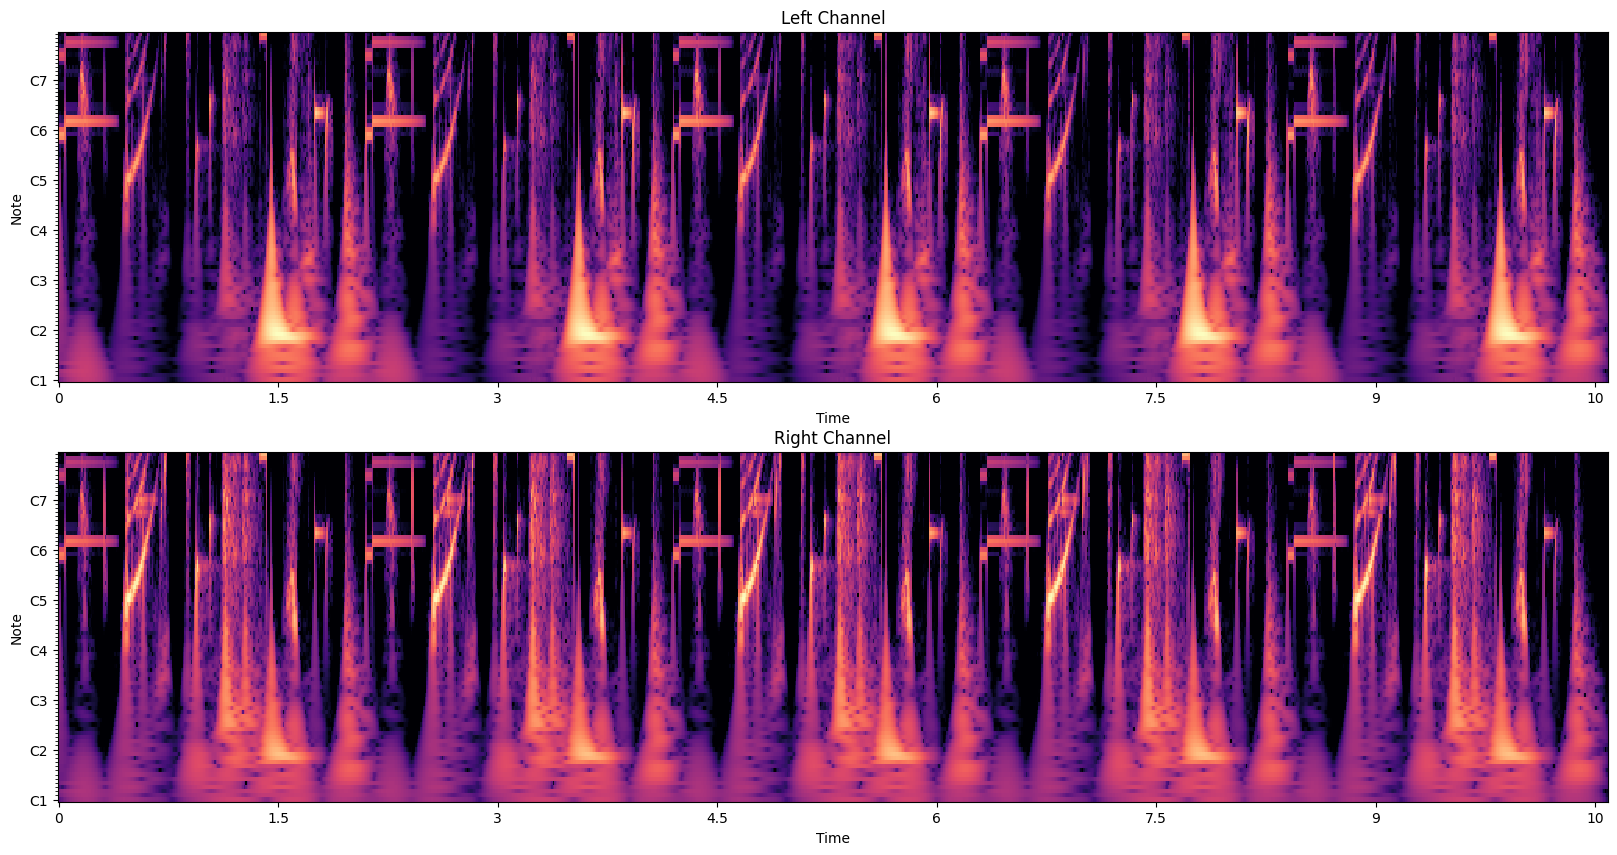

In [84]:
track.clear()
num_events = 20
cycle_duration = 2.1

pattern = cosmos.Pattern.randomized(num_events, cycle_duration, samples, cycles=5)
track = cosmos.AudioTrack(duration=pattern.dur_tot*2)
track.add_audio(pattern.to_audio(), time=0.0)
# print(pattern.to_audio())
cosmos.play_audio(track)
track.plot_waveform()
track.plot_cqt_spectrogram()

<Figure size 640x480 with 0 Axes>

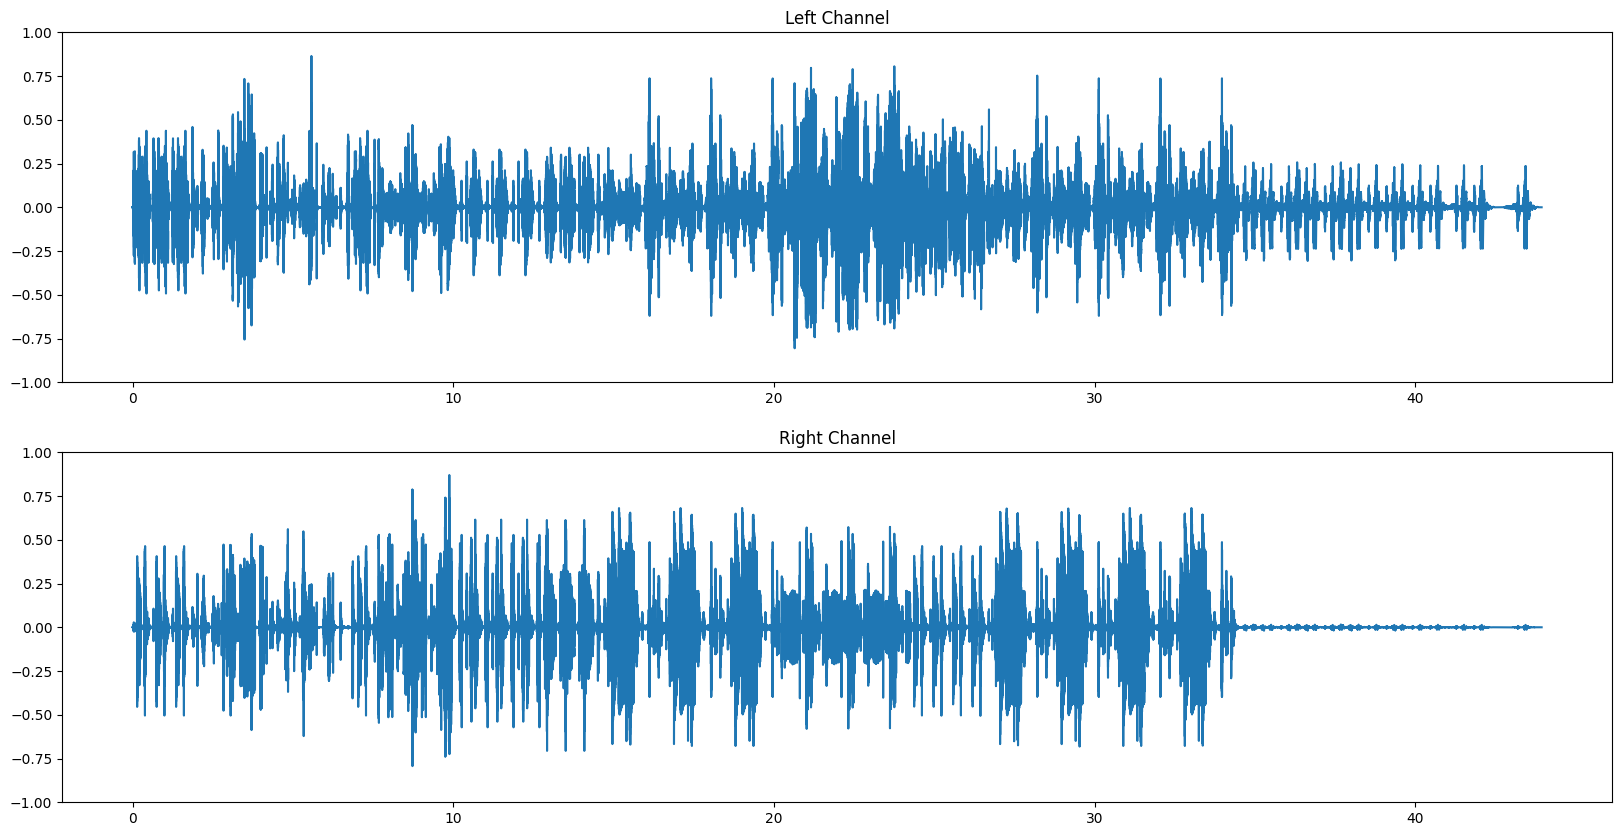

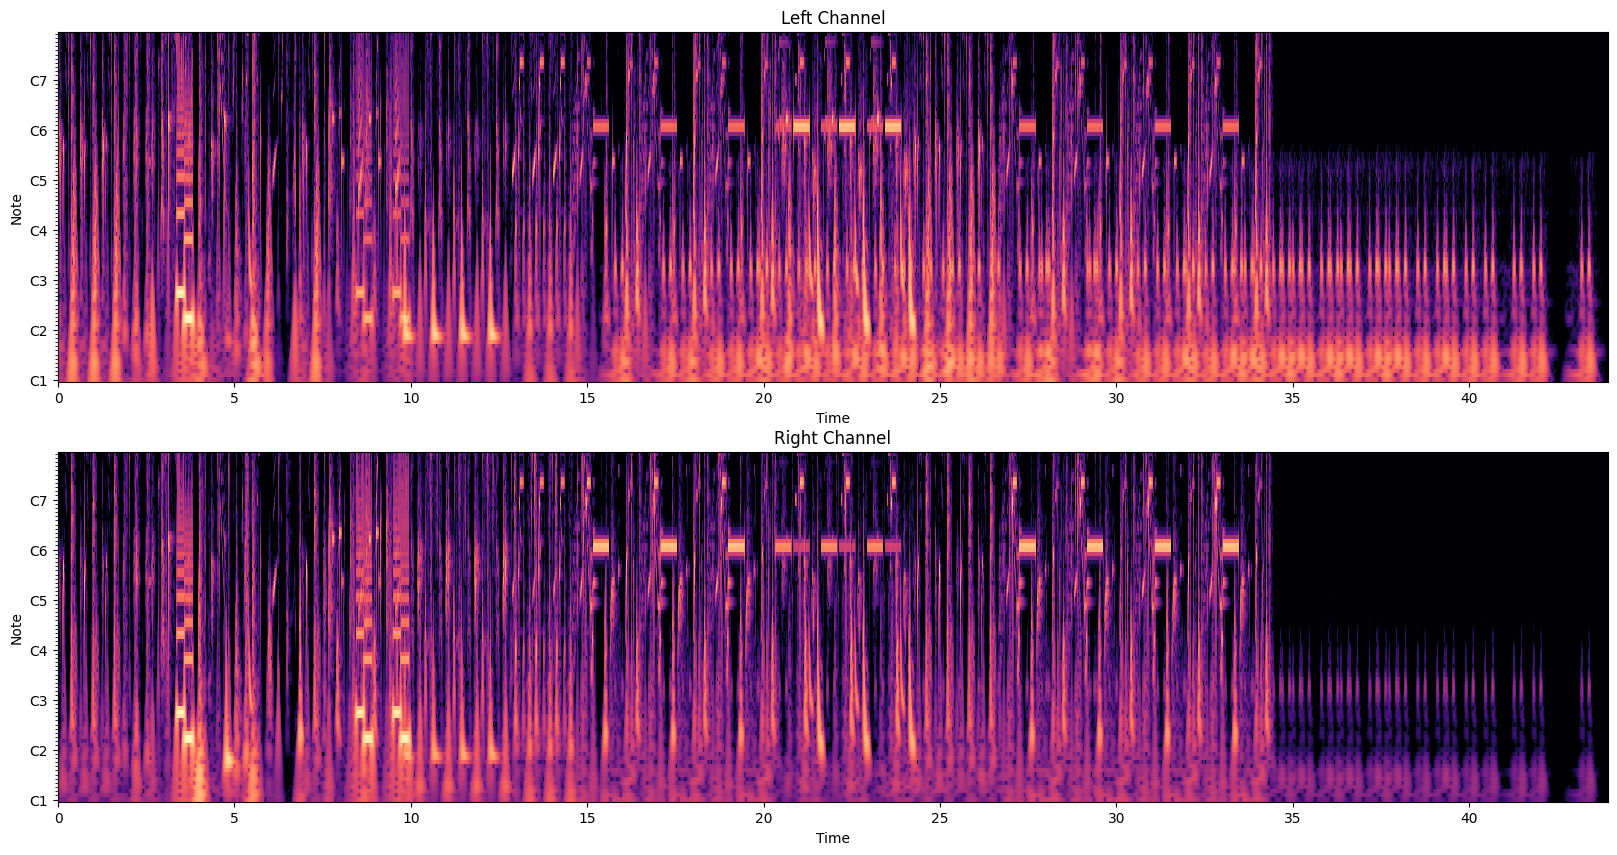

In [85]:
# make a sequence of randomized patterns

number_of_patterns = 15
number_of_sections = 10

cycle_duration_avg = 1.5
std = 2
cycle_durations = cycle_duration_avg * 2 ** np.random.uniform(-std, std, number_of_patterns)
avg_densities = 10 * 2 ** np.random.uniform(-1, 1, number_of_patterns)
pattern_sizes = np.round(avg_densities * cycle_durations).astype(int)

# pattern_sizes = np.random.randint(6, 15, number_of_patterns)
numbers_of_cycles = np.random.randint(1, 5, number_of_sections)
patterns = []
for i in range(number_of_patterns):
    pattern = cosmos.Pattern.randomized(pattern_sizes[i], cycle_durations[i], samples, cycles=1)
    patterns.append(pattern)

total_duration = np.sum([pattern.dur_tot for pattern in patterns])
track = cosmos.AudioTrack(duration=total_duration + 10)
time = 0.0
for i in range(number_of_sections):
    pattern = np.random.choice(patterns)
    pattern.cycles = numbers_of_cycles[i]
    track.add_audio(pattern.to_audio(), time=time)
    time += pattern.dur_tot

cosmos.play_audio(track)
track.plot_waveform()
track.plot_cqt_spectrogram()
